In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import make_regression

#Linear Regression

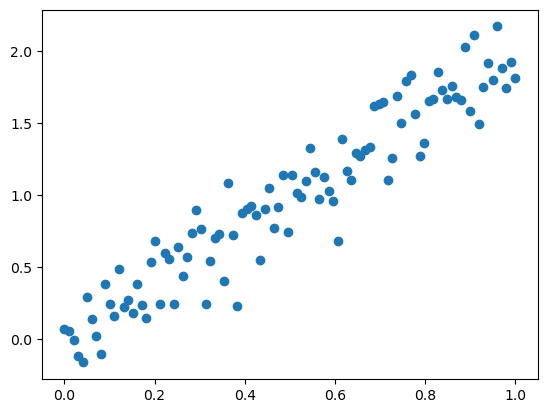

In [2]:
X_train = np.linspace(0,1,100)
y_train = 2*X_train+np.random.randn(100)/5
X_train = np.expand_dims(X_train, axis=-1)# X_train.shape = (100,) --> (100,1)

plt.scatter(X_train, y_train)

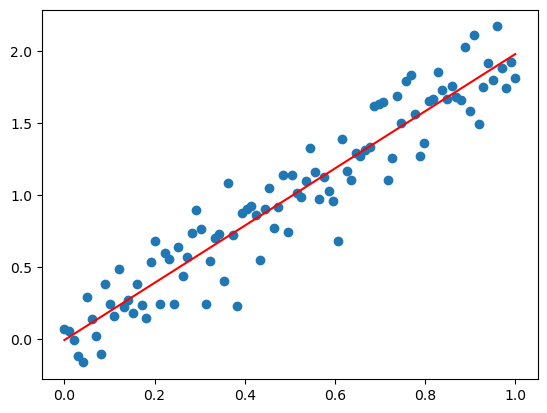

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

X_test = np.linspace(0,1,1000)
X_test = np.expand_dims(X_test, axis=-1)
y_pred = model.predict(X_test)

plt.plot(X_test, y_pred,'r')
plt.scatter(X_train, y_train)
plt.show()

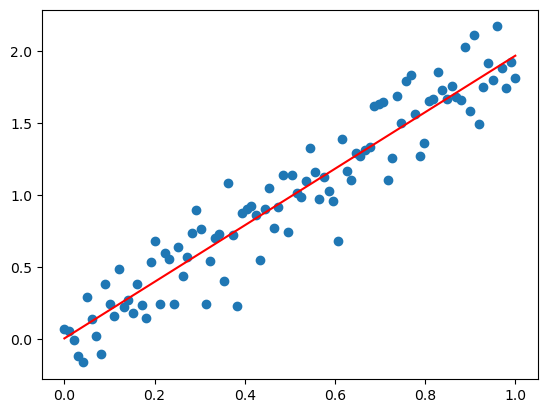

In [4]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

X_test = np.linspace(0,1,1000)
X_test = np.expand_dims(X_test, axis=-1)
y_pred = model.predict(X_test)

plt.plot(X_test, model.predict(X_test),'r')
plt.scatter(X_train, y_train)
plt.show()

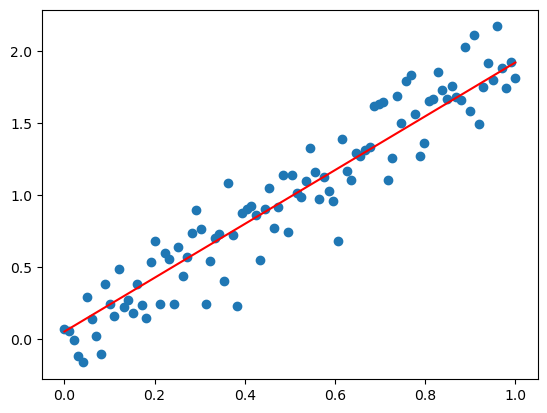

In [5]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

X_test = np.linspace(0,1,1000)
X_test = np.expand_dims(X_test, axis=-1)
y_pred = model.predict(X_test)

plt.plot(X_test, model.predict(X_test),'r')
plt.scatter(X_train, y_train)
plt.show()

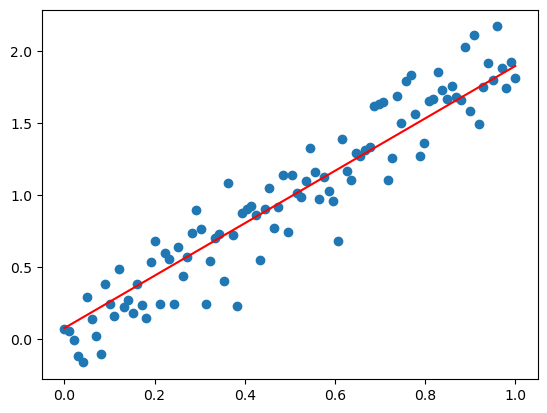

In [6]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

X_test = np.linspace(0,1,1000)
X_test = np.expand_dims(X_test, axis=-1)
y_pred = model.predict(X_test)

plt.plot(X_test, model.predict(X_test),'r')
plt.scatter(X_train, y_train)
plt.show()

#Regularization path

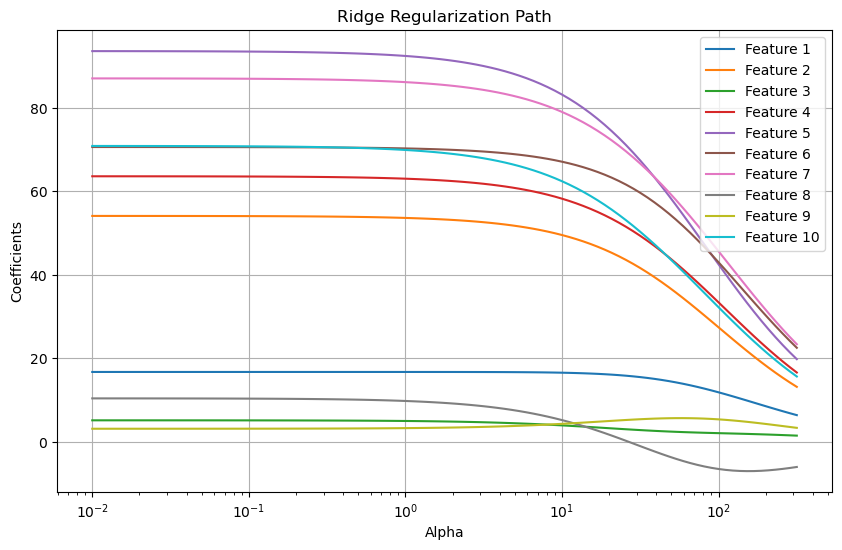

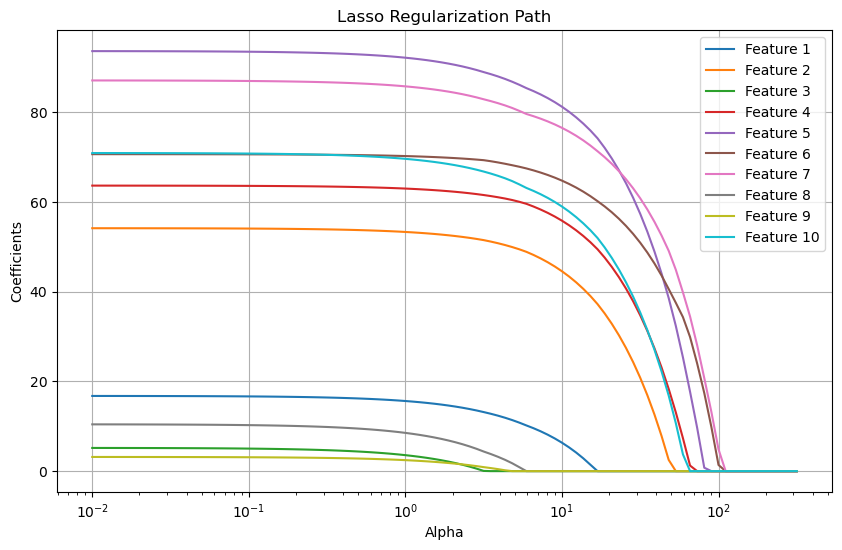

In [7]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

alphas = np.logspace(-2, 2.5, 100)

coefficients = []
for alpha in alphas:
    lasso = Ridge(alpha=alpha)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regularization Path')
plt.legend(loc='best')
plt.grid(True)
plt.show()



coefficients = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regularization Path')
plt.legend(loc='best')
plt.grid(True)
plt.show()


#Application of Time-Series Forecasting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
# Create lagged features
def create_lagged_features(df, lag=1):
    df_lagged = df.copy()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{lag-i+1}'] = df['Passengers'].shift(i)
    df_lagged.dropna(inplace=True)
    return df_lagged

lag = 5
df_lagged = create_lagged_features(df, lag)

X = df_lagged.drop(columns=['Passengers'])
X = X.iloc[:,::-1]
y = df_lagged['Passengers']

print(X)
print(y)

            lag_1  lag_2  lag_3  lag_4  lag_5
Month                                        
1949-06-01  112.0  118.0  132.0  129.0  121.0
1949-07-01  118.0  132.0  129.0  121.0  135.0
1949-08-01  132.0  129.0  121.0  135.0  148.0
1949-09-01  129.0  121.0  135.0  148.0  148.0
1949-10-01  121.0  135.0  148.0  148.0  136.0
...           ...    ...    ...    ...    ...
1960-08-01  419.0  461.0  472.0  535.0  622.0
1960-09-01  461.0  472.0  535.0  622.0  606.0
1960-10-01  472.0  535.0  622.0  606.0  508.0
1960-11-01  535.0  622.0  606.0  508.0  461.0
1960-12-01  622.0  606.0  508.0  461.0  390.0

[139 rows x 5 columns]
Month
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 139, dtype: int64


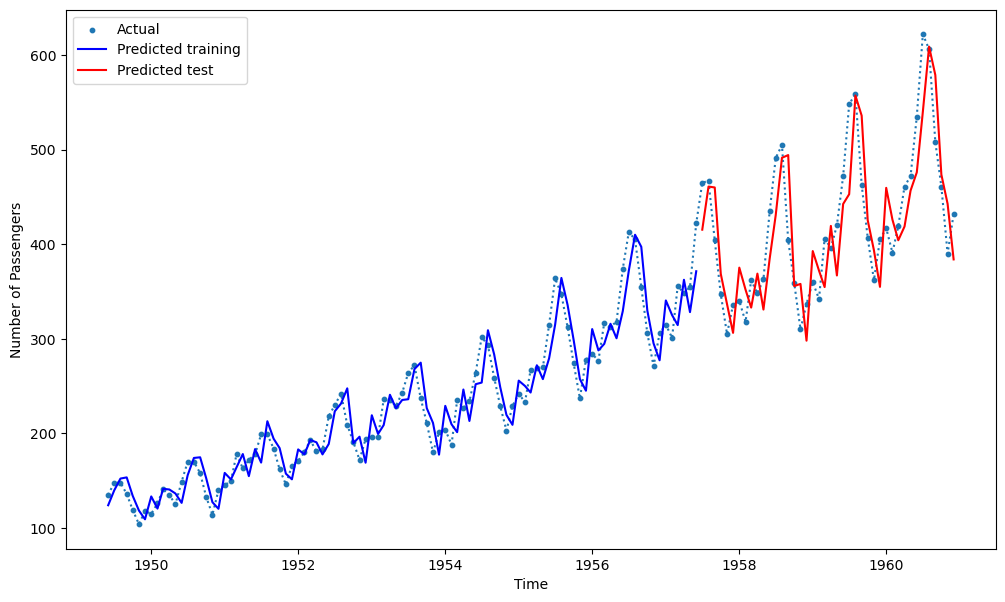

MSE: 1996.229129578156
RMSE: 44.679180045947085
MAE: 38.54181659104639
MAPE: 0.09227103554214881
R2: 0.6681798733369768


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 7))
plt.scatter(y.index, y, s=10 , label='Actual')
plt.plot(y.index, y, linestyle=':')
# plt.plot(y.index, model.predict(X), label='Predicted test', color='red')
plt.plot(y_train.index, model.predict(X_train), label='Predicted training', color='blue')
plt.plot(y_test.index, model.predict(X_test), label='Predicted test', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()


print(f"MSE: {metrics.mean_squared_error(y_test, model.predict(X_test))}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, model.predict(X_test))}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, model.predict(X_test))}")
print(f"R2: {metrics.r2_score(y_test, model.predict(X_test))}")

#Non-Linear Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

n_samples = 30
true_fun = lambda X: np.sin(2.0 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2
X = np.expand_dims(X, axis=-1)

degree = 3

polynomial = PolynomialFeatures(degree=degree, include_bias=False)
polynomial.fit(X)
polynomial.transform(X)

array([[5.86567469e-03, 3.44061396e-05, 2.01815222e-07],
       [5.18177223e-02, 2.68507634e-03, 1.39134540e-04],
       [5.98114335e-02, 3.57740758e-03, 2.13969876e-04],
       [9.41104042e-02, 8.85676817e-03, 8.33514032e-04],
       [9.76327189e-02, 9.53214780e-03, 9.30649507e-04],
       [1.41288201e-01, 1.99623557e-02, 2.82044531e-03],
       [1.60083814e-01, 2.56268275e-02, 4.10244029e-03],
       [1.75370803e-01, 3.07549186e-02, 5.39351477e-03],
       [2.01501300e-01, 4.06027740e-02, 8.18151176e-03],
       [2.47028892e-01, 6.10232734e-02, 1.50745116e-02],
       [2.70380784e-01, 7.31057686e-02, 1.97663950e-02],
       [3.25886674e-01, 1.06202124e-01, 3.46098570e-02],
       [3.28666407e-01, 1.08021607e-01, 3.55030735e-02],
       [3.53416094e-01, 1.24902935e-01, 4.41427076e-02],
       [3.56947366e-01, 1.27411422e-01, 4.54791715e-02],
       [3.68917585e-01, 1.36100184e-01, 5.02097512e-02],
       [3.84958659e-01, 1.48193169e-01, 5.70482439e-02],
       [4.64172066e-01, 2.15455

(-2.0, 2.0)

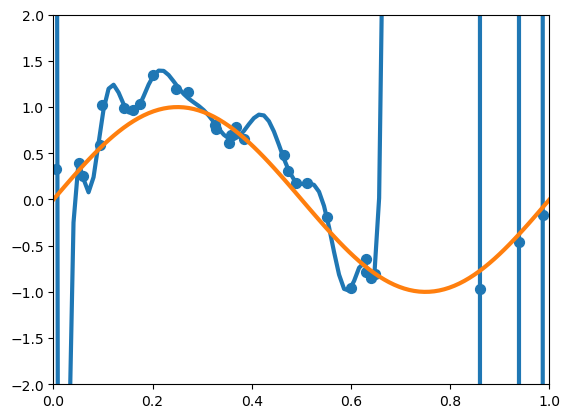

In [12]:
degree = 20

polynomial = PolynomialFeatures(degree=degree, include_bias=False)
polynomial.fit(X)

model = LinearRegression()
model.fit(polynomial.transform(X), y)

X_test = np.linspace(0, 1, 100)
X_test = np.expand_dims(X_test, axis=-1)
plt.plot(X_test, model.predict(polynomial.transform(X_test)), label="Model", linewidth=3)
plt.plot(X_test, true_fun(X_test), label="True function", linewidth=3)
plt.scatter(X, y, s=50, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))

2406594026.257743
224845827673896.0


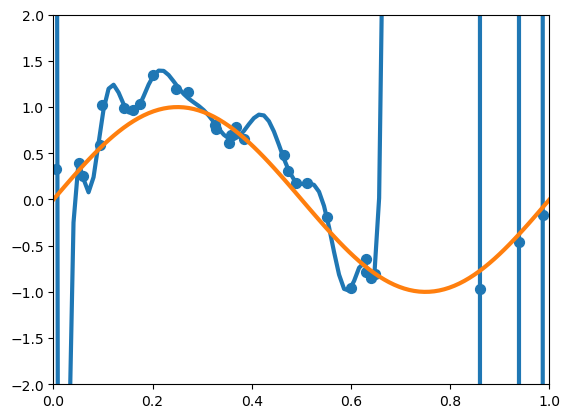

In [13]:
from sklearn.pipeline import Pipeline

degree = 20

pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
    ])
pipeline.fit(X, y)

X_test = np.linspace(0, 1, 100)
X_test = np.expand_dims(X_test, axis=-1)
plt.plot(X_test, pipeline.predict(X_test), label="Model", linewidth=3)
plt.plot(X_test, true_fun(X_test), label="True function", linewidth=3)
plt.scatter(X, y, s=50, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))

print(metrics.mean_squared_error(true_fun(X_test), pipeline.predict(X_test)))
print(np.linalg.norm(pipeline['linear_regression'].coef_)) #weight size

0.1804680400964758
3.0955110192534567


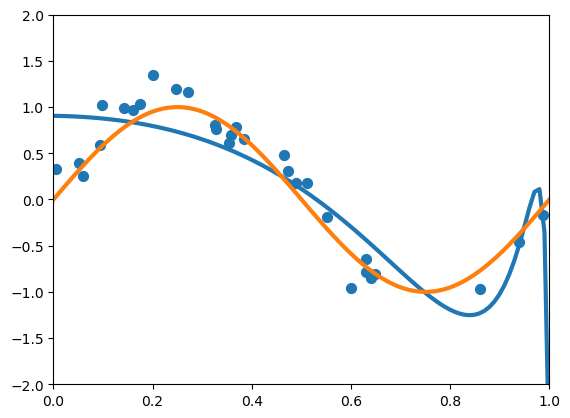

In [14]:
from sklearn.pipeline import Pipeline

degree = 1000

pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", Ridge(alpha=0.1))
    ])
pipeline.fit(X, y)

X_test = np.linspace(0, 1, 100)
X_test = np.expand_dims(X_test, axis=-1)
plt.plot(X_test, pipeline.predict(X_test), label="Model", linewidth=3)
plt.plot(X_test, true_fun(X_test), label="True function", linewidth=3)
plt.scatter(X, y, s=50, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))

print(metrics.mean_squared_error(true_fun(X_test), pipeline.predict(X_test)))
print(np.linalg.norm(pipeline['linear_regression'].coef_)) #weight size

#Workshop

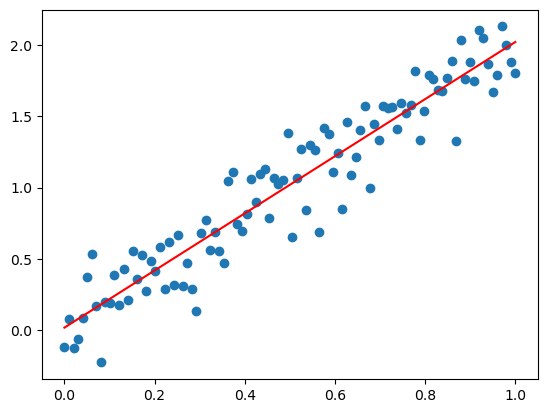

In [15]:
#OLS - Closed-form solution
class LS:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        x = np.insert(X, 0, 1, axis=1)
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

    def predict(self, X):
        x = np.insert(X, 0, 1, axis=1)
        return np.dot(x, self.w)




X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = LS()
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()

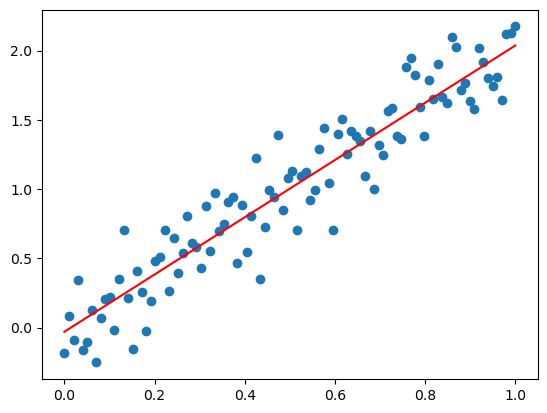

In [16]:
#L2 Regularization - Closed-form solution
class L2(LS): # inherit from LS
    def __init__(self, alpha):
        self.alpha = alpha
        self.w = None

    def fit(self, X, y):
        x = np.insert(X, 0, 1, axis=1)
        _test = ((x.T).dot(x))
        _test = np.linalg.inv(_test+(self.alpha*np.eye(_test.shape[0])))
        self.w = _test.dot(x.T.dot(y))

    def predict(self, X):
        x = np.insert(X, 0, 1, axis=1)
        return np.dot(x, self.w)



X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = L2(alpha=0.1)
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()

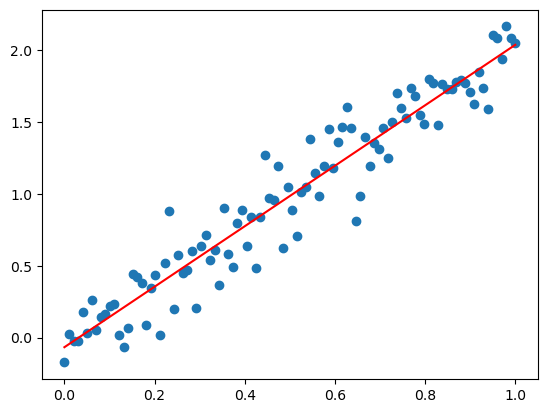

In [17]:
#OLS - Iterative method
class Regression:
    def __init__(self, lr, n_iter):
        self.w = None
        self.b = None
        self.lr = lr
        self.n_iter = n_iter

    def update(self, X, y):
        y_pred = self.predict(X)
        self.w = self.w + self.lr*(((y-y_pred).dot(X)).sum())
        self.b = self.b + self.lr*(y-y_pred).sum()
        
    def fit(self, X, y):
        self.w = np.zeros((X.shape[1],))
        self.b = 0

        for _ in range(self.n_iter):
            self.update(X, y)

    def predict(self, X):
        return np.dot(X, self.w) + self.b


X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = Regression(lr=0.01, n_iter=10000)
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()

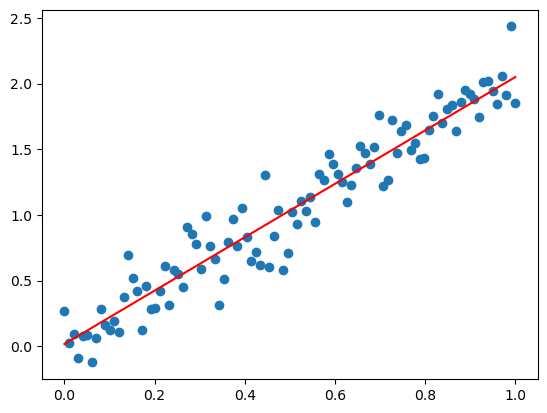

In [18]:
#L2 Regularization - iterative method
class RidgeRegression(Regression):
    def __init__(self, lr, n_iter, alpha):
        self.alpha = alpha
        super().__init__(lr=lr, n_iter=n_iter)

    def update(self, X, y):
        y_pred = self.predict(X)
        self.w = self.w+self.lr*(((y-y_pred).dot(X)).sum()-self.alpha*self.w)
        self.b = self.b+self.lr*((y-y_pred).sum())
        
X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = RidgeRegression(lr=0.01, n_iter=10000, alpha=0.1)
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()

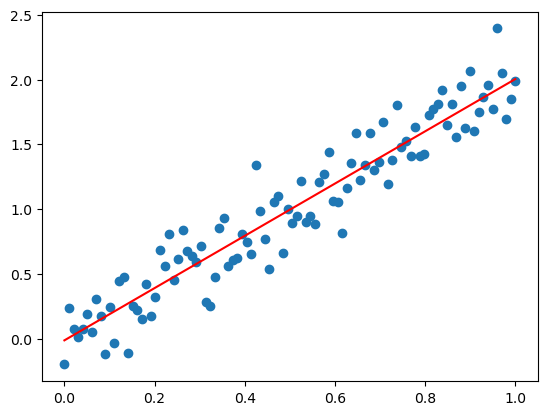

In [19]:
#L1 Regularization
class LassoRegression(Regression):
    def __init__(self, lr, n_iter, alpha):
        self.alpha = alpha
        super().__init__(lr=lr, n_iter=n_iter)

    def update(self, X, y):
        y_pred = self.predict(X)
        self.w = self.w + self.lr*(((y-y_pred).dot(X)).sum()-(self.alpha*np.sign(self.w)))
        self.b = self.b + self.lr*((y-y_pred).sum())

X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = LassoRegression(lr=0.01, n_iter=10000, alpha=0.1)
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()

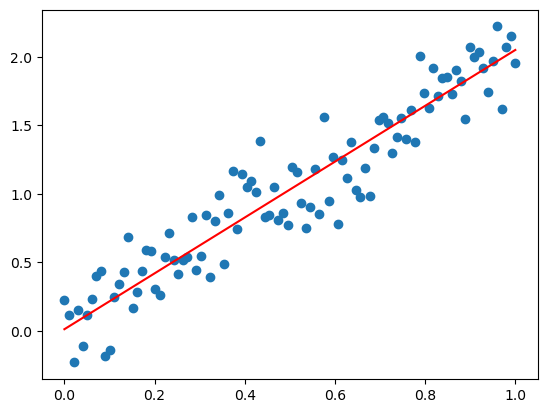

In [20]:
#L1/L2 Regularization
class ElasticNet(Regression):
    def __init__(self, lr, n_iter, alpha, ratio):
        self.alpha = alpha
        self.ratio = ratio
        super().__init__(lr=lr, n_iter=n_iter)

    def update(self, X, y):
        y_pred = self.predict(X)
        self.w = self.w + self.lr*(((y-y_pred).dot(X))-self.alpha*((1-self.ratio)*(self.w)) + self.ratio*np.sign(self.w))
        self.b = self.b + self.lr*((y-y_pred).sum())

X = np.linspace(0,1,100)
y = 2*X+np.random.randn(100)/5
X = np.expand_dims(X, axis=-1)

model = ElasticNet(lr=0.01, n_iter=10000, alpha=0.1, ratio=0.5)
model.fit(X,y)

plt.scatter(X, y)
line = np.expand_dims(np.linspace(0, 1, 100), axis=-1)
plt.plot(line, model.predict(line),'r')
plt.show()